In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [44]:
df = pd.read_csv('nba.csv')
df.head(10)

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Joel Embiid,Phi,C,30.2,6,41.4,35.7,15.8,78,...,5.7,1.2,1.5,4.2,43.8,38.7,49.5,12.2,117.1,108.0
1,2,Jalen Brunson,Nyk,G,27.8,13,39.8,36.4,9.3,120,...,7.5,0.8,0.2,2.7,35.7,39.8,43.2,9.3,114.8,114.7
2,3,Damian Lillard,Mil,G,33.9,4,39.1,31.4,10.0,38,...,5.0,1.0,0.0,2.3,34.5,36.3,39.5,8.2,127.6,115.7
3,4,Shai Gilgeous-Alexander,Okc,G,25.9,10,39.9,32.3,8.9,81,...,6.4,1.3,1.7,2.2,37.4,36.6,43.8,11.2,118.3,106.9
4,5,Tyrese Maxey,Phi,G,23.6,6,44.6,28.1,8.6,28,...,6.8,0.8,0.3,2.2,35.0,36.7,41.8,9.1,120.9,113.3
5,6,Donovan Mitchell,Cle,G,27.8,10,38.2,34.3,11.1,65,...,4.7,1.3,0.3,2.8,35.0,34.3,39.7,9.5,111.5,108.3
6,7,Luka Doncic,Dal,G,25.3,20,41.2,32.9,15.3,141,...,8.4,1.8,0.4,4.1,38.5,37.3,46.9,12.9,110.5,108.9
7,8,Nikola Jokic,Den,C,29.3,12,40.2,30.0,14.1,71,...,8.7,1.4,0.7,3.3,42.1,37.3,50.8,14.9,125.6,106.4
8,9,LeBron James,Lal,F,39.5,5,40.8,29.0,16.1,23,...,8.8,2.4,1.0,3.8,34.6,36.6,43.4,11.6,118.5,110.4
9,10,Anthony Davis,Lal,C,31.3,5,41.6,25.7,10.5,26,...,4.0,0.4,1.6,2.2,43.4,31.8,47.4,11.6,127.4,105.1


In [4]:
df.isnull().sum()
df.dtypes

RANK       int64
NAME      object
TEAM      object
POS       object
AGE      float64
GP         int64
MPG      float64
USG%     float64
TO%      float64
FTA        int64
FT%      float64
2PA        int64
2P%      float64
3PA        int64
3P%      float64
eFG%     float64
TS%      float64
PPG      float64
RPG      float64
APG      float64
SPG      float64
BPG      float64
TPG      float64
P+R      float64
P+A      float64
P+R+A    float64
VI       float64
ORtg     float64
DRtg     float64
dtype: object

In [5]:
df.describe

<bound method NDFrame.describe of      RANK                     NAME TEAM POS   AGE  GP   MPG  USG%   TO%  FTA  \
0       1              Joel Embiid  Phi   C  30.2   6  41.4  35.7  15.8   78   
1       2            Jalen Brunson  Nyk   G  27.8  13  39.8  36.4   9.3  120   
2       3           Damian Lillard  Mil   G  33.9   4  39.1  31.4  10.0   38   
3       4  Shai Gilgeous-Alexander  Okc   G  25.9  10  39.9  32.3   8.9   81   
4       5             Tyrese Maxey  Phi   G  23.6   6  44.6  28.1   8.6   28   
..    ...                      ...  ...  ..   ...  ..   ...   ...   ...  ...   
208   209              David Roddy  Pho   F  23.2   2   1.4   0.0   0.0    0   
209   210           Gordon Hayward  Okc   F  34.2   7   6.6   3.0   0.0    0   
210   211           Thaddeus Young  Pho   F  36.0   1   3.6   0.0   0.0    0   
211   212              T.J. Warren  Min   F  30.8   3   3.8   8.1   0.0    0   
212   213            Isaiah Thomas  Pho   G  35.3   1   3.6  39.1  33.3    0   

     

In [6]:
# Since there is no NULL values there is no need to fill in NULL values

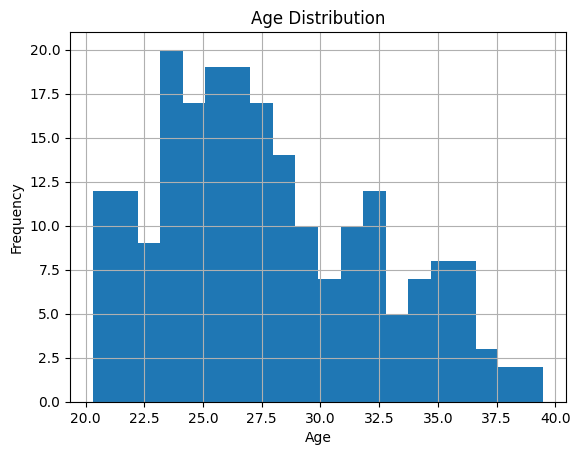

In [7]:
df['AGE'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


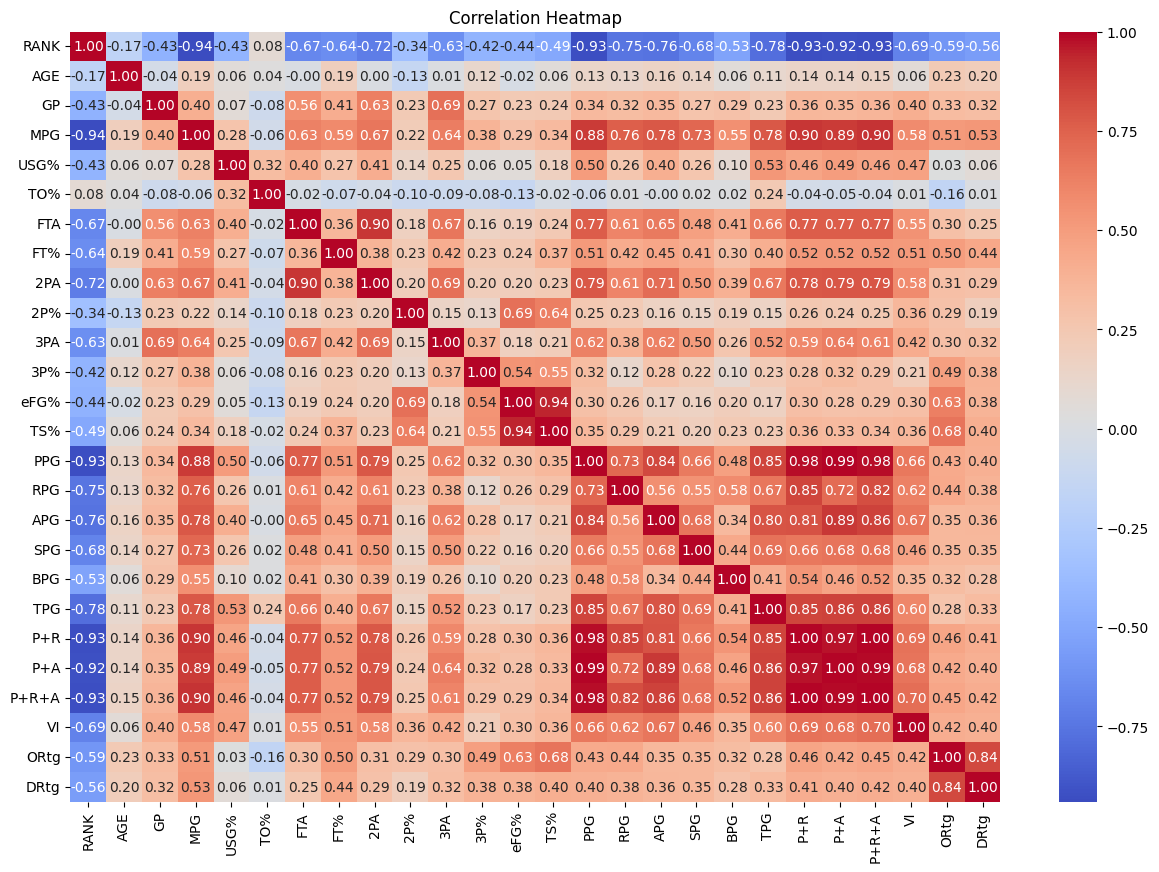

In [8]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
avg_points_by_position = df.groupby('POS')['PPG'].mean().reset_index()
avg_points_by_position = avg_points_by_position.sort_values(by='PPG', ascending=False)

avg_points_by_position

,POS,PPG
0,C,12.087500
5,G,9.710843
2,F,7.711111
6,G-F,5.230000
1,C-F,4.566667
3,F-C,4.200000
4,F-G,4.150000


C:\Users\jaded\AppData\Local\Temp\ipykernel_10964\1590643184.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PPG', y='POS', data=avg_points_by_position, palette='rocket')


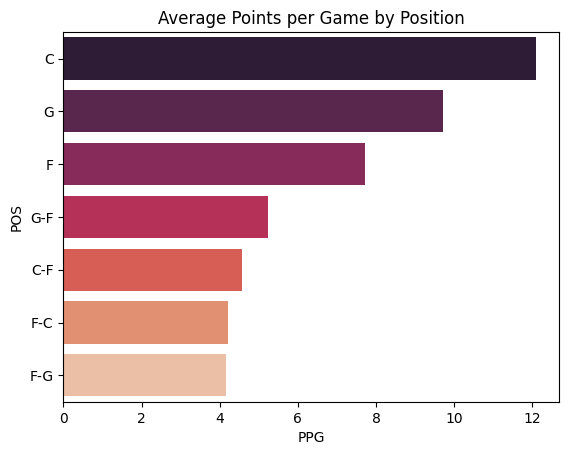

In [10]:
sns.barplot(x='PPG', y='POS', data=avg_points_by_position, palette='rocket')
plt.title('Average Points per Game by Position')
plt.xlabel('PPG')
plt.ylabel('POS')
plt.show()

In [35]:
best_player_ppg = df[['RANK','NAME','PPG']].sort_values(by='PPG', ascending=False).head(15)
best_rebound_player =  df[['RANK', 'NAME','RPG']].sort_values(by='RPG', ascending=False).head(15)
best_assist_player = df[['RANK', 'NAME','APG']].sort_values(by='APG', ascending=False).head(15)

C:\Users\jaded\AppData\Local\Temp\ipykernel_10964\3083691894.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PPG', y='NAME', data=best_player_ppg, palette='rocket', ax=axs[0])
C:\Users\jaded\AppData\Local\Temp\ipykernel_10964\3083691894.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RPG', y='NAME', data=best_rebound_player, palette='rocket', ax=axs[1])
C:\Users\jaded\AppData\Local\Temp\ipykernel_10964\3083691894.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='APG', y='NAME', data=best_assist_player, palette='rocket', a

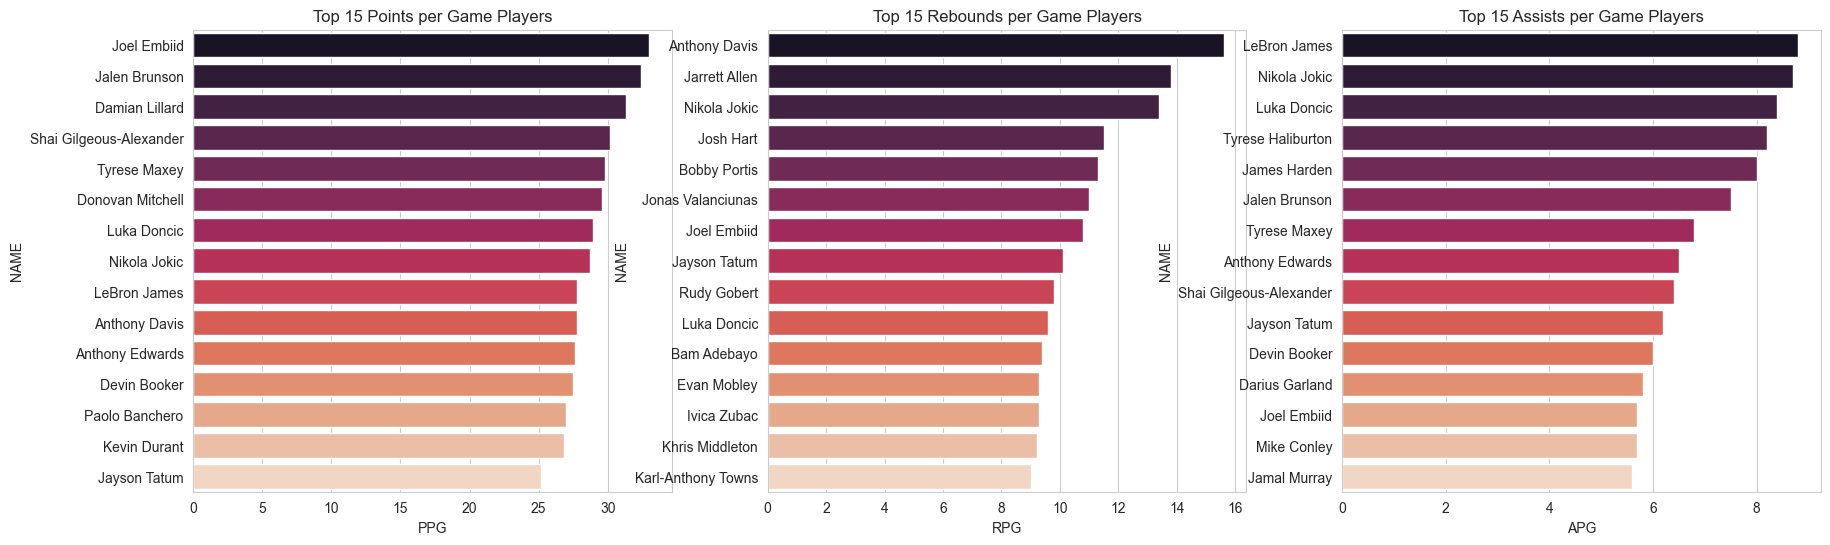

In [36]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(21, 6))
sns.set_style('whitegrid')

sns.barplot(x='PPG', y='NAME', data=best_player_ppg, palette='rocket', ax=axs[0])
axs[0].set_title('Top 15 Points per Game Players')

sns.barplot(x='RPG', y='NAME', data=best_rebound_player, palette='rocket', ax=axs[1])
axs[1].set_title('Top 15 Rebounds per Game Players')

sns.barplot(x='APG', y='NAME', data=best_assist_player, palette='rocket', ax=axs[2])
axs[2].set_title('Top 15 Assists per Game Players')

plt.show()

C:\Users\jaded\AppData\Local\Temp\ipykernel_10964\2701528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DRtg', y='NAME', data=best_player_defensive, palette='rocket')


Text(0.5, 1.0, 'Top 15 Defensive Players')

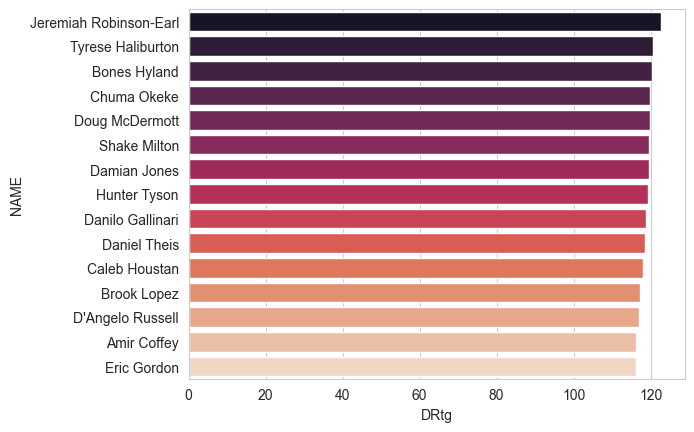

In [40]:
best_player_defensive = df[['RANK','NAME','DRtg']].sort_values(by='DRtg', ascending=False).head(15)
sns.barplot(x='DRtg', y='NAME', data=best_player_defensive, palette='rocket')
axs[0].set_title('Top 15 Defensive Players')

C:\Users\jaded\AppData\Local\Temp\ipykernel_10964\2890320909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ORtg', y='NAME', data=best_player_offensive, palette='rocket')


Text(0.5, 1.0, 'Top 15 Offensive Players')

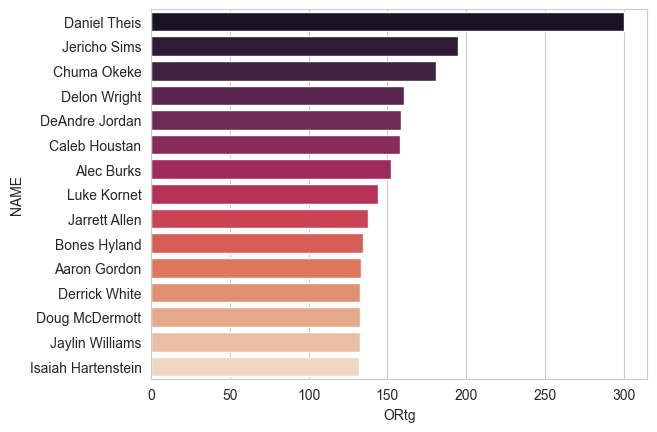

In [43]:
best_player_offensive = df[['RANK','NAME','ORtg']].sort_values(by='ORtg', ascending=False).head(15)
sns.barplot(x='ORtg', y='NAME', data=best_player_offensive, palette='rocket')
axs[0].set_title('Top 15 Offensive Players')

C:\Users\jaded\AppData\Local\Temp\ipykernel_10964\1265514440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FTA', y='NAME', data=best_ft_player, palette='rocket')


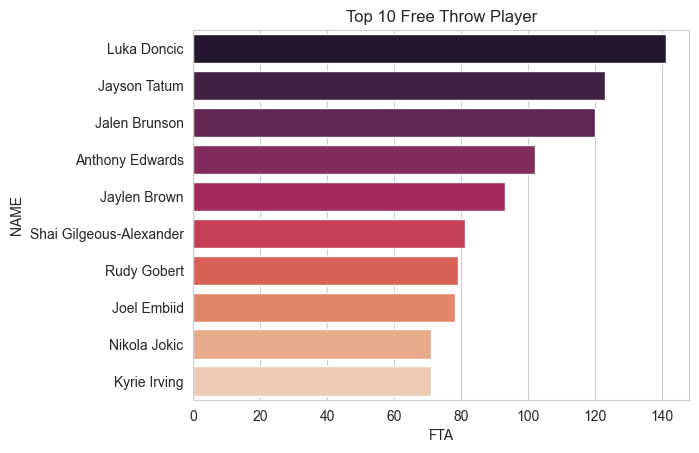

In [13]:
best_ft_player = df[['RANK', 'NAME','FTA']].sort_values(by='FTA', ascending=False).head(10)
sns.barplot(x='FTA', y='NAME', data=best_ft_player, palette='rocket')
plt.title('Top 10 Free Throw Player')
plt.show()

In [14]:
df.columns

Index(['RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'USG%', 'TO%', 'FTA',
       'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'APG',
       'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A', 'VI', 'ORtg', 'DRtg'],
      dtype='object')

C:\Users\jaded\AppData\Local\Temp\ipykernel_10964\2485540350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MPG', y='NAME', data=most_mpg_player, palette='rocket')


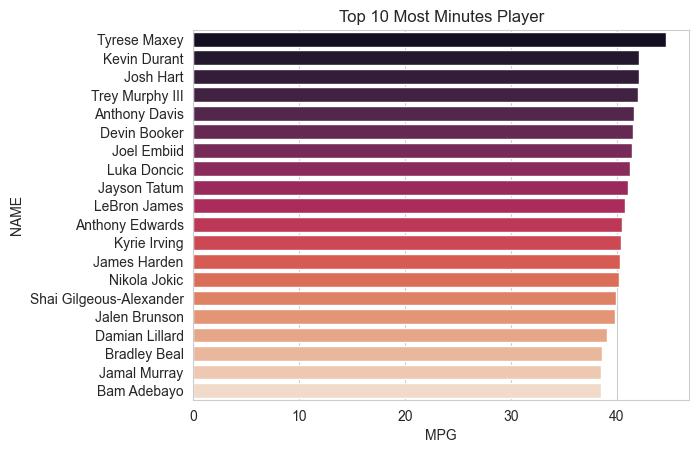

In [15]:
most_mpg_player = df[['RANK', 'NAME','MPG']].sort_values(by='MPG', ascending=False).head(20)
sns.barplot(x='MPG', y='NAME', data=most_mpg_player, palette='rocket')
plt.title('Top 10 Most Minutes Player')
plt.show()

R-squared: 0.8170848312611002
Mean Squared Error: 10.462069015814478


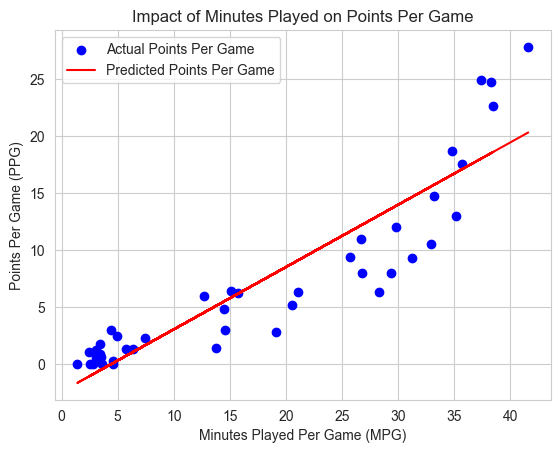

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_numeric[['MPG']] 
y = df_numeric['PPG']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

plt.scatter(X_test, y_test, color='blue', label="Actual Points Per Game")
plt.plot(X_test, y_pred, color='red', label="Predicted Points Per Game")
plt.xlabel("Minutes Played Per Game (MPG)")
plt.ylabel("Points Per Game (PPG)")
plt.title("Impact of Minutes Played on Points Per Game")
plt.legend()
plt.show()


In [21]:
df.columns

Index(['RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'USG%', 'TO%', 'FTA',
       'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'APG',
       'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A', 'VI', 'ORtg', 'DRtg'],
      dtype='object')

In [26]:
features = ['PPG','FT%','RPG','APG','SPG','BPG','TPG','ORtg','DRtg']
X = df_numeric[features]

# Target: Points Scored
y = df_numeric['MPG']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R-squared: 0.8865217694384816
Mean Squared Error: 19.96139274988079


  Feature  Importance
4     SPG    5.203864
1     FT%    3.953006
5     BPG    2.639492
2     RPG    0.871736
0     PPG    0.754320
3     APG    0.736981
8    DRtg    0.104964
7    ORtg   -0.060311
6     TPG   -1.166408


C:\Users\jaded\AppData\Local\Temp\ipykernel_10964\4253983228.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=coefficients, palette='viridis')


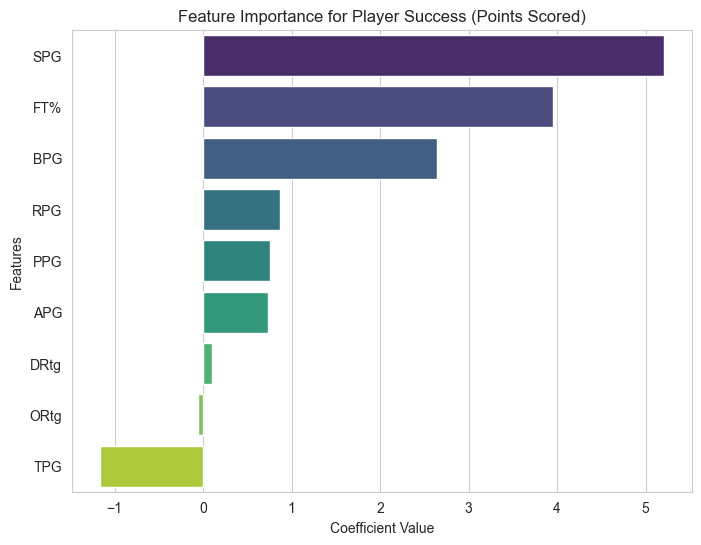

In [29]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Importance': model.coef_
})

coefficients = coefficients.sort_values(by='Importance', ascending=False)

print(coefficients)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=coefficients, palette='viridis')
plt.title("Feature Importance for Player Success (Points Scored)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()
